# 可视化方法汇总

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

## 1. 单个随机变量的可视化方法

### 1.1 Scatter Plot

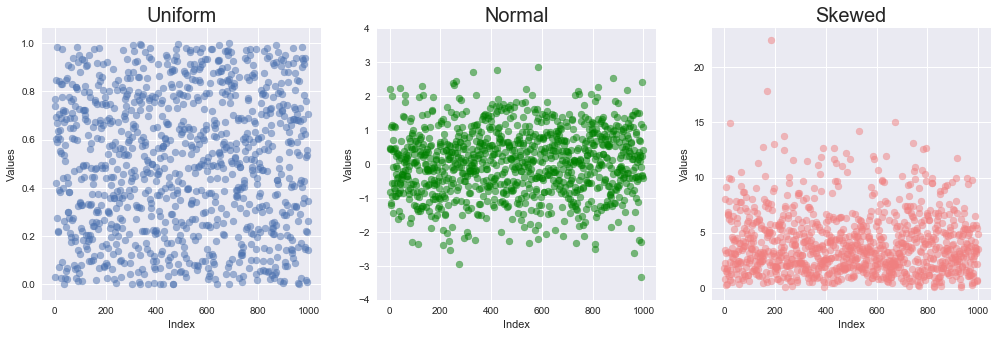

In [21]:
size = 1000
idx = np.arange(size)
data_uniform = np.random.rand(size)
data_normal = np.random.randn(size)
data_gamma = np.random.gamma(2, 2, size=size)

plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.title("Uniform", size=20)
plt.scatter(idx, data_uniform, alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Values")
plt.subplot(132)
plt.title("Normal", size=20)
plt.scatter(idx, data_normal, alpha=0.5, color='green')
plt.xlabel("Index")
plt.ylabel("Values")
plt.ylim(-4, 4)
plt.subplot(133)
plt.title("Skewed", size=20)
plt.scatter(idx, data_gamma, alpha=0.5, color='lightcoral')
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

### 1.2 Box Plot

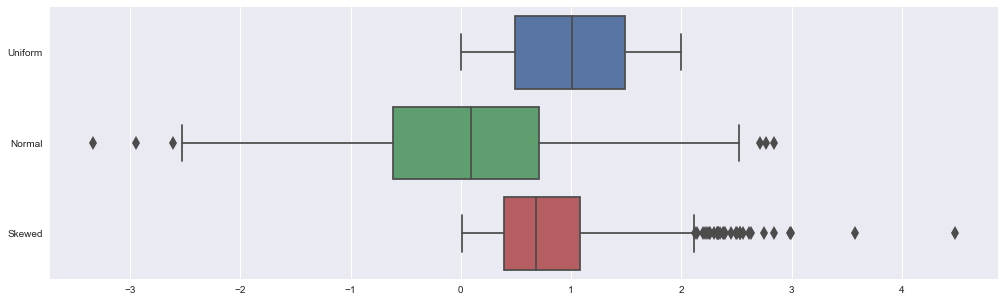

In [22]:
combined = pd.DataFrame({'Uniform':data_uniform * 2, 'Normal':data_normal, 'Skewed':(data_gamma/5.0)}, columns=['Uniform', 'Normal', 'Skewed'])

plt.figure(figsize=(17, 5))
sns.boxplot(combined, orient='h', fliersize=10)


### 1.3 Histogram for PDF & CDF

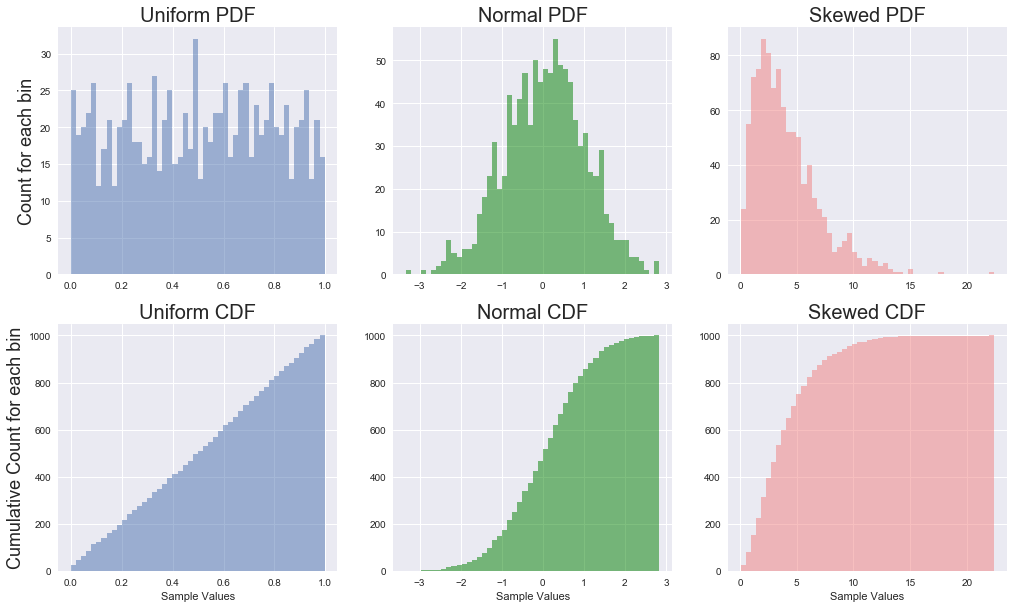

In [23]:
plt.figure(figsize=(17, 10))
plt.subplot(231)
plt.title("Uniform PDF", size=20)
plt.hist(data_uniform, bins=50, alpha=0.5)
plt.ylabel('Count for each bin', size=18)
plt.subplot(232)
plt.title("Normal PDF", size=20)
plt.hist(data_normal, bins=50, alpha=0.5, color='green')
plt.subplot(233)
plt.title("Skewed PDF", size=20)
plt.hist(data_gamma, bins=50, alpha=0.5, color='lightcoral')
plt.subplot(234)
plt.title("Uniform CDF", size=20)
plt.hist(data_uniform, bins=50, alpha=0.5, cumulative=True)
plt.ylabel('Cumulative Count for each bin', size=18)
plt.xlabel('Sample Values')
plt.subplot(235)
plt.title("Normal CDF", size=20)
plt.hist(data_normal, bins=50, alpha=0.5, cumulative=True, color='green')
plt.xlabel('Sample Values')
plt.subplot(236)
plt.title("Skewed CDF", size=20)
plt.hist(data_gamma, bins=50, alpha=0.5, cumulative=True, color='lightcoral')
plt.xlabel('Sample Values')
plt.show()

### 1.4 KDE Curve for PDF & CDF / Rug Plot

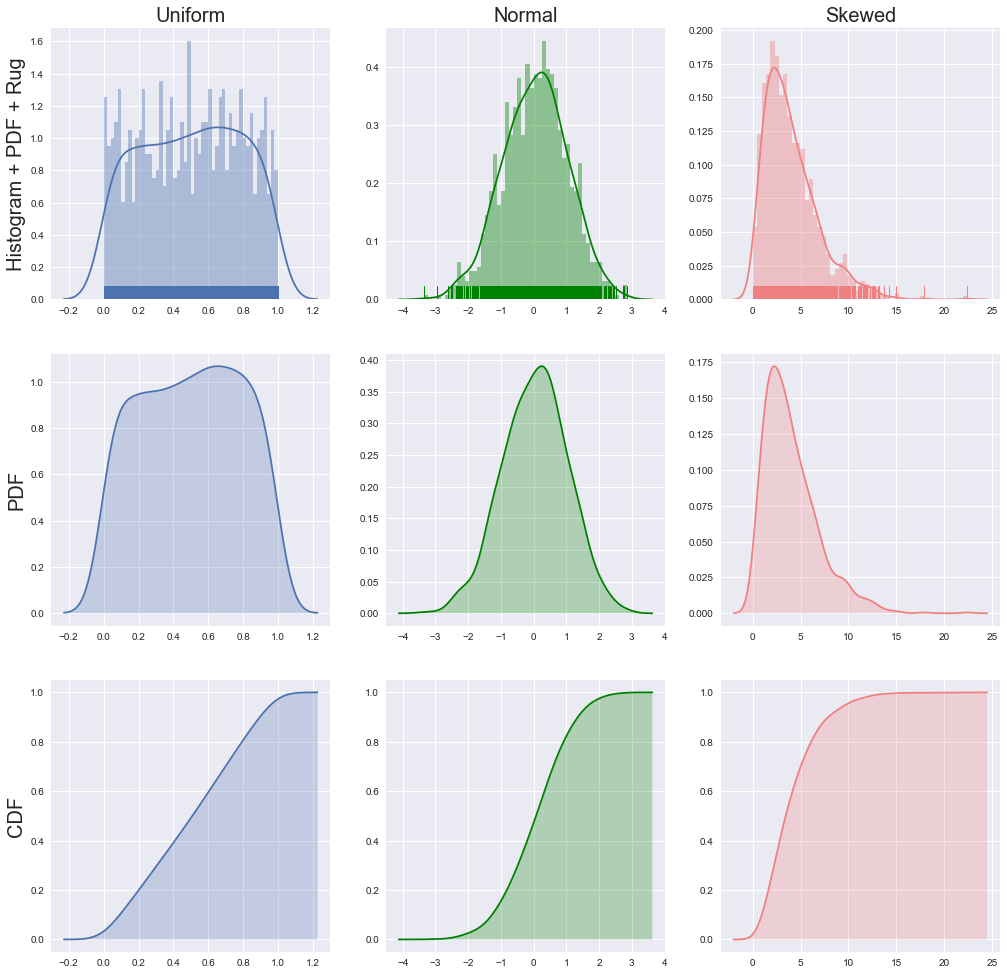

In [27]:
plt.figure(figsize=(17, 17))
plt.subplot(331)
plt.title("Uniform", size=20)
sns.distplot(data_uniform, bins=50, rug=True)
plt.ylabel('Histogram + PDF + Rug', size=20)
plt.subplot(332)
plt.title("Normal", size=20)
sns.distplot(data_normal, bins=50, rug=True, color='green')
plt.subplot(333)
plt.title("Skewed", size=20)
sns.distplot(data_gamma, bins=50, rug=True, color='lightcoral')
plt.subplot(334)
sns.kdeplot(data_uniform, shade=True)
plt.ylabel('PDF', size=20)
plt.subplot(335)
sns.kdeplot(data_normal, color='green', shade=True)
plt.subplot(336)
sns.kdeplot(data_gamma, color='lightcoral', shade=True)
plt.subplot(337)
sns.kdeplot(data_uniform, shade=True, cumulative=True)
plt.ylabel('CDF', size=20)
plt.subplot(338)
sns.kdeplot(data_normal, color='green', shade=True, cumulative=True)
plt.subplot(339)
sns.kdeplot(data_gamma, color='lightcoral', shade=True, cumulative=True)
plt.show()

## 2. 两个随机变量的可视化方法

### 2.1 Scatter Plot

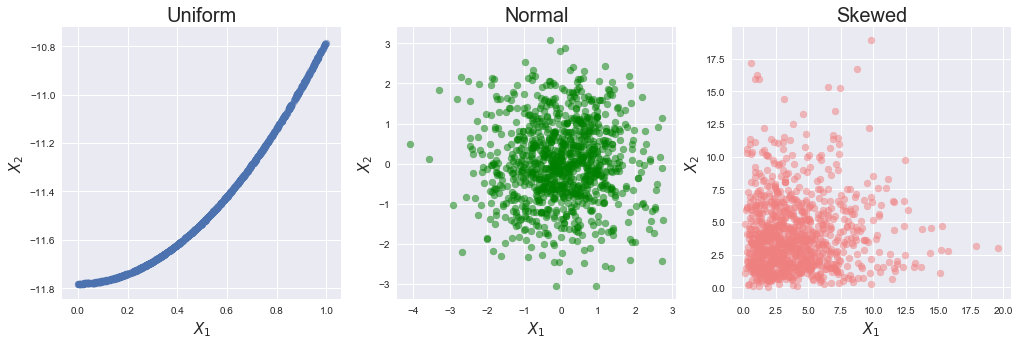

In [56]:
size = 1000
idx = np.arange(size)
data_uniform1 = np.random.rand(size)
data_uniform2 = data_uniform1**2 + np.random.randn()*10
data_normal1 = np.random.randn(size)
data_normal2 = np.random.randn(size)
data_gamma1 = np.random.gamma(2, 2, size=size)
data_gamma2 = np.random.gamma(2, 2, size=size)

plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.scatter(data_uniform1, data_uniform2, alpha=0.5)
plt.title("Uniform", size=20)
plt.xlabel('$X_1$', size=15)
plt.ylabel('$X_2$', size=15)
plt.subplot(132)
plt.scatter(data_normal1, data_normal2, alpha=0.5, color='green')
plt.title("Normal", size=20)
plt.xlabel('$X_1$', size=15)
plt.ylabel('$X_2$', size=15)
plt.subplot(133)
plt.scatter(data_gamma1, data_gamma2, alpha=0.5, color='lightcoral')
plt.title("Skewed", size=20)
plt.xlabel('$X_1$', size=15)
plt.ylabel('$X_2$', size=15)
plt.show()

### 2.2 Seaborn Joint Plot

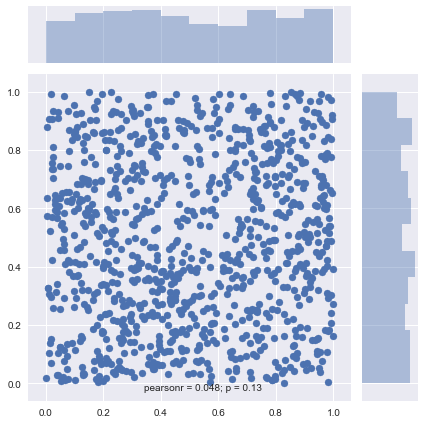

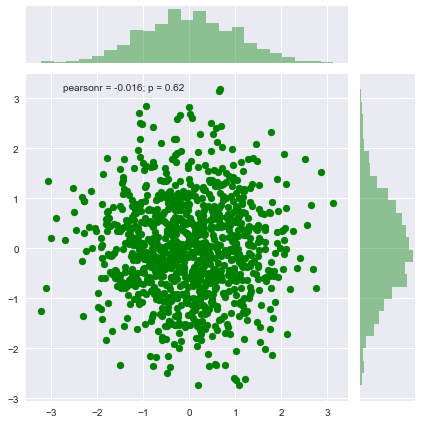

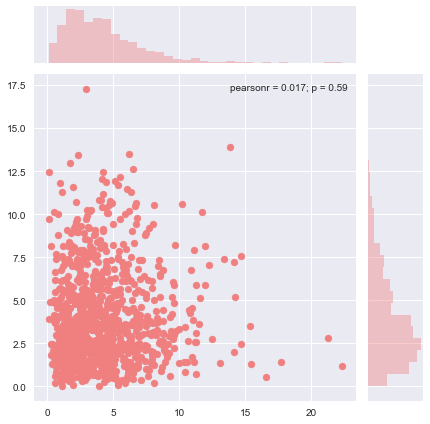

In [52]:
plt.figure(figsize=(17, 5))
sns.jointplot(data_uniform1, data_uniform2)
sns.jointplot(data_normal1, data_normal2, color='green')
sns.jointplot(data_gamma1, data_gamma2, color='lightcoral')

### 2.3 Correlation Matrix / Pair Plot

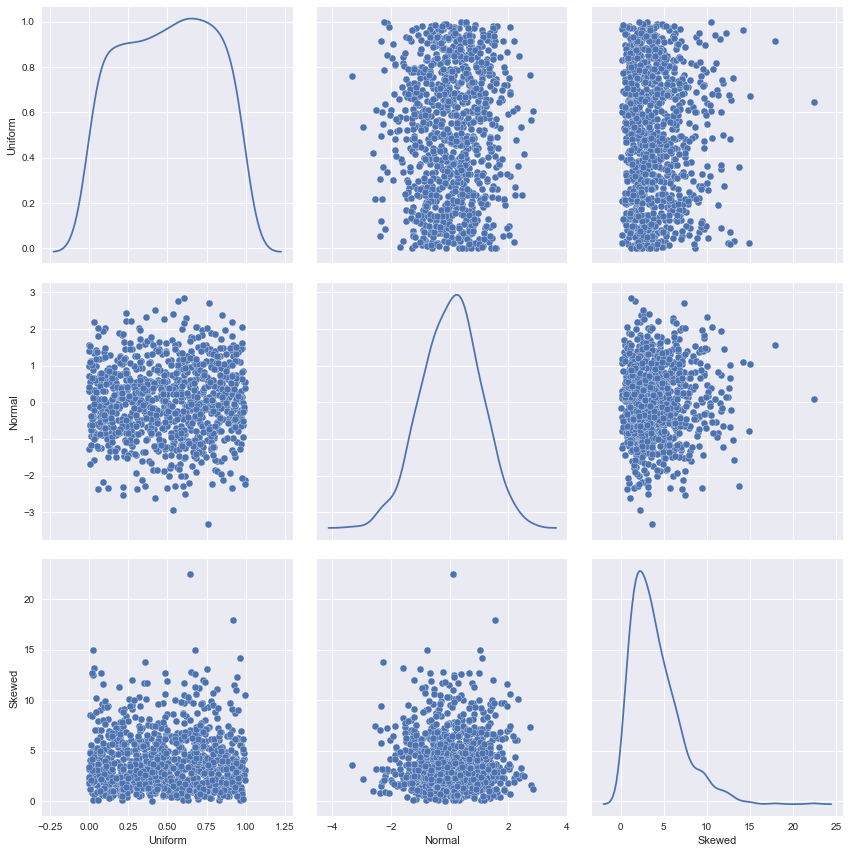

In [67]:

df = pd.DataFrame({"Uniform":data_uniform, "Normal":data_normal, "Skewed":data_gamma}, columns=["Uniform", 'Normal', 'Skewed'])
sns.pairplot(df, diag_kind='kde', size=4)

## 3. 随机变量的正规化前后的分布变化

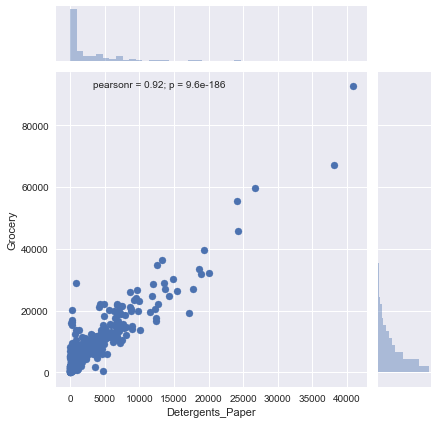

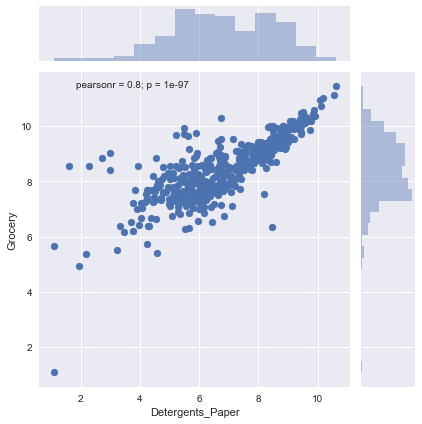

In [68]:
sns.jointplot(data['Detergents_Paper'], data['Grocery'])
sns.jointplot(log_data['Detergents_Paper'], log_data['Grocery'])

In [70]:
data = pd.read_csv('customers.csv')

In [71]:
data = data.drop(['Channel', 'Region'], axis=1)
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [17]:
log_data = np.log(data)

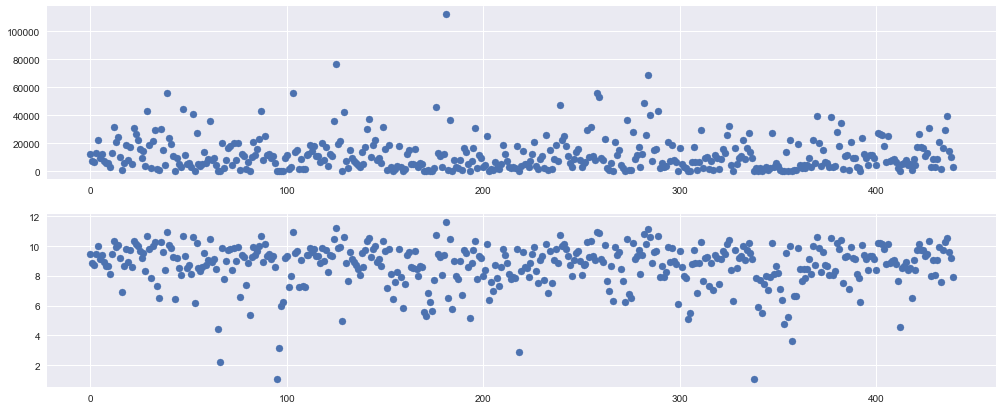

In [18]:
plt.figure(figsize=(17, 7))
plt.subplot(211)
plt.scatter(np.arange(data['Fresh'].shape[0]), data['Fresh'])
plt.subplot(212)
plt.scatter(np.arange(log_data['Fresh'].shape[0]), log_data['Fresh'])
plt.show()

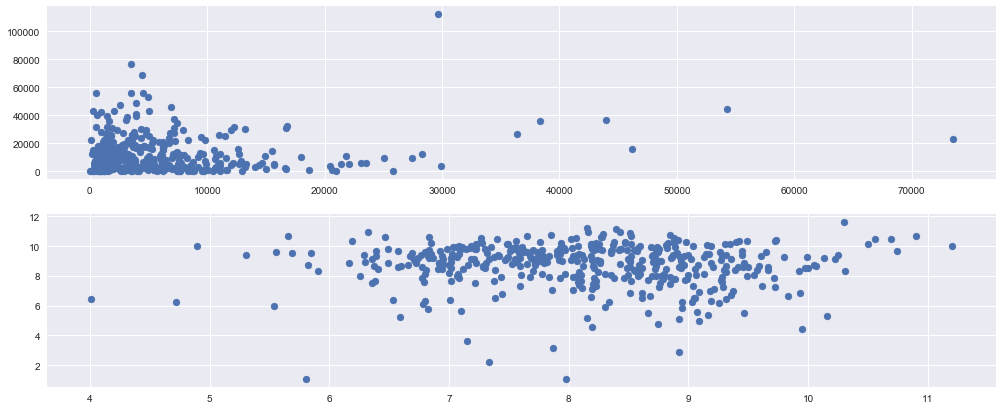

In [19]:
plt.figure(figsize=(17, 7))
plt.subplot(211)
plt.scatter(data['Milk'], data['Fresh'])
plt.subplot(212)
plt.scatter(log_data['Milk'], log_data['Fresh'])
plt.show()

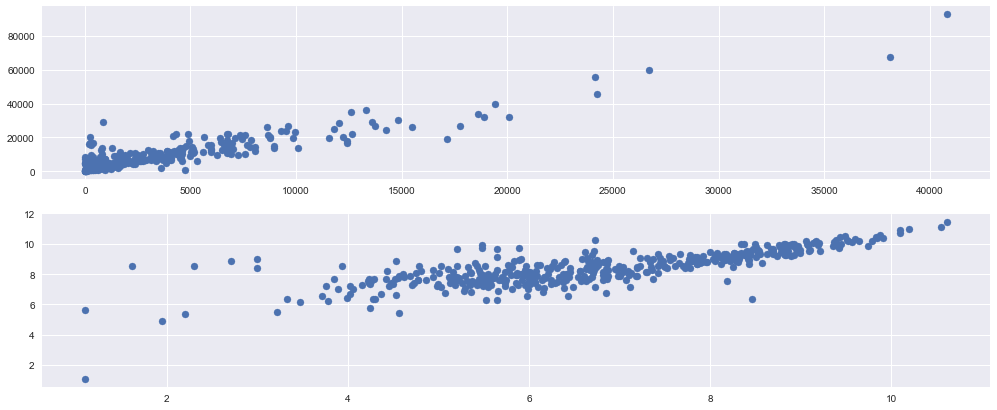

In [20]:
plt.figure(figsize=(17, 7))
plt.subplot(211)
plt.scatter(data['Detergents_Paper'], data['Grocery'])
plt.subplot(212)
plt.scatter(log_data['Detergents_Paper'], log_data['Grocery'])
plt.show()